In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from scipy import stats
from scipy.stats import norm

In [2]:
df = pd.read_csv('D:\master.csv')
df.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [3]:
df.drop(columns = ['country-year'], inplace = True)

In [4]:
pd.set_option('display.max_rows', None)
df['country'].value_counts()

Austria                         382
Iceland                         382
Netherlands                     382
Mauritius                       382
Belgium                         372
Mexico                          372
Republic of Korea               372
Luxembourg                      372
Puerto Rico                     372
Spain                           372
Chile                           372
Ecuador                         372
Japan                           372
Argentina                       372
Brazil                          372
United Kingdom                  372
Greece                          372
Colombia                        372
Malta                           372
Italy                           372
Singapore                       372
Israel                          372
United States                   372
Guatemala                       360
Bulgaria                        360
Norway                          360
Ireland                         360
Australia                   

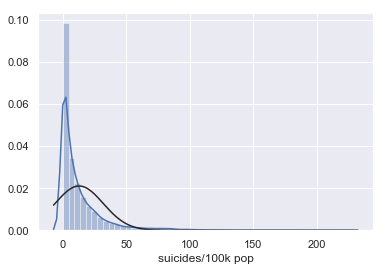

In [5]:
sns.distplot(df['suicides/100k pop'], fit = norm)
sns.set(rc = {'figure.figsize':(12,6)})

In [6]:
row = df.isnull().any(axis = 1)
column = df.isnull().any(axis = 0)
df.loc[row, column].head()

,HDI for year
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [7]:
df['HDI for year'].isnull().sum()

19456

In [8]:
df['HDI for year'].value_counts()

0.888    84
0.772    84
0.713    84
0.830    72
0.793    72
0.909    72
0.756    72
0.827    72
0.761    72
0.780    60
0.890    60
0.874    60
0.730    60
0.711    60
0.648    60
0.785    60
0.727    60
0.750    60
0.683    60
0.786    60
0.867    60
0.883    60
0.752    60
0.778    60
0.819    60
0.783    48
0.892    48
0.821    48
0.759    48
0.897    48
0.886    48
0.722    48
0.679    48
0.723    48
0.824    48
0.816    48
0.865    48
0.782    48
0.788    48
0.912    48
0.850    48
0.623    48
0.837    48
0.742    48
0.740    48
0.766    48
0.861    48
0.729    48
0.815    48
0.741    48
0.715    48
0.817    48
0.849    48
0.884    48
0.753    36
0.814    36
0.690    36
0.724    36
0.717    36
0.855    36
0.915    36
0.666    36
0.881    36
0.841    36
0.836    36
0.654    36
0.833    36
0.905    36
0.907    36
0.710    36
0.674    36
0.738    36
0.762    36
0.720    36
0.911    36
0.805    36
0.873    36
0.779    36
0.903    36
0.653    36
0.634    36
0.731    36
0.901    36
0.83

In [9]:
df['sex'].value_counts()

female    13910
male      13910
Name: sex, dtype: int64

In [10]:
df.groupby(['year', 'sex'])['suicides_no'].median()

year  sex   
1985  female     7.0
      male      27.5
1986  female    10.0
      male      31.5
1987  female     9.0
      male      29.5
1988  female    13.0
      male      41.0
1989  female    14.0
      male      41.0
1990  female    17.0
      male      48.5
1991  female    17.0
      male      49.0
1992  female    17.0
      male      60.0
1993  female    18.0
      male      56.0
1994  female    16.0
      male      50.5
1995  female    16.0
      male      52.0
1996  female    16.0
      male      57.0
1997  female    16.5
      male      57.0
1998  female    17.5
      male      56.5
1999  female    16.5
      male      54.5
2000  female    13.0
      male      47.5
2001  female    12.0
      male      43.5
2002  female    14.0
      male      50.0
2003  female    13.0
      male      50.0
2004  female    11.5
      male      43.0
2005  female    11.0
      male      40.0
2006  female    11.0
      male      45.0
2007  female    11.0
      male      39.0
2008  female    13.0


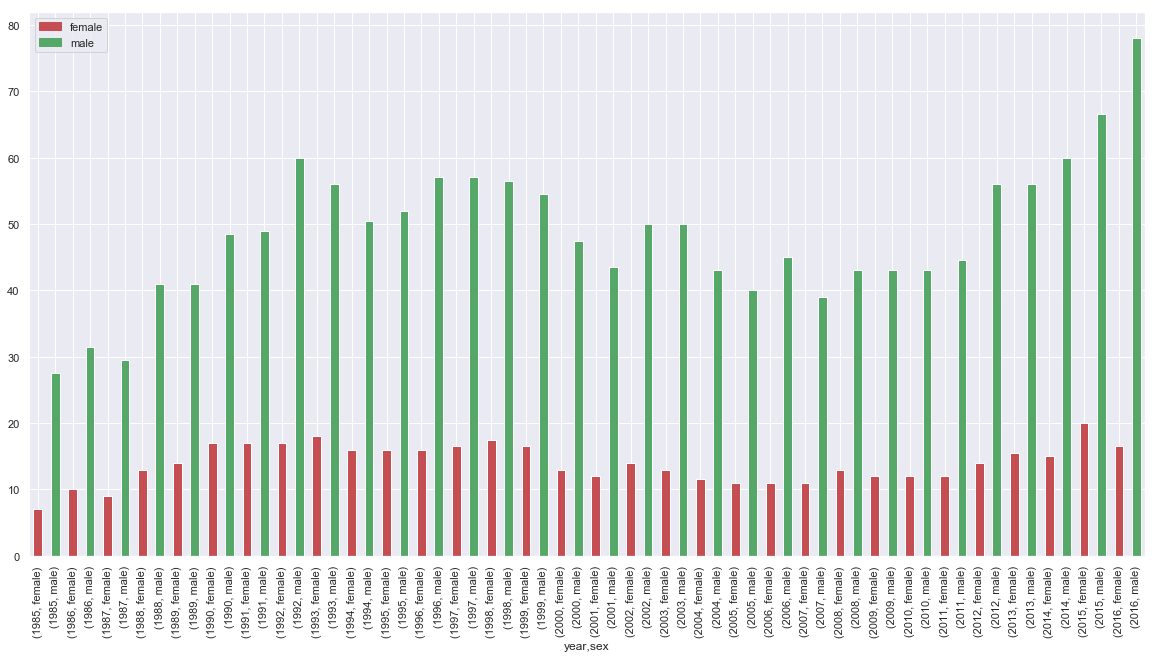

In [11]:
import matplotlib.patches as mpatches
df.groupby(['year', 'sex'])['suicides_no'].median().plot(kind = 'bar', figsize = (20,10), color = ['r','g'])
fem = mpatches.Patch(color = 'r', label = 'female')
male = mpatches.Patch(color = 'g', label = 'male')
plt.legend(handles = [fem, male])

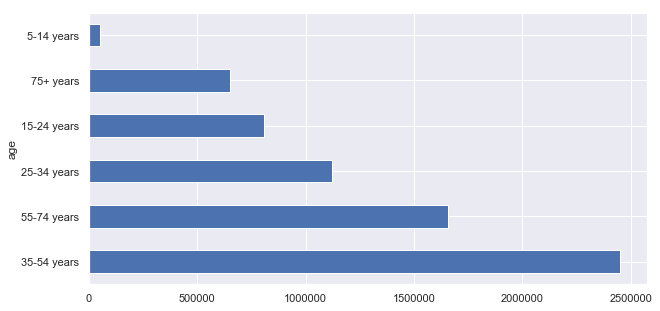

In [12]:
df.groupby(['age'])['suicides_no'].sum().sort_values(ascending = False).plot(kind = 'barh', figsize = (10,5))

In [13]:
df.groupby(['age','sex'])['suicides_no'].sum()

age          sex   
15-24 years  female     175437
             male       633105
25-34 years  female     208823
             male       915089
35-54 years  female     506233
             male      1945908
5-14 years   female      16997
             male        35267
55-74 years  female     430036
             male      1228407
75+ years    female     221984
             male       431134
Name: suicides_no, dtype: int64

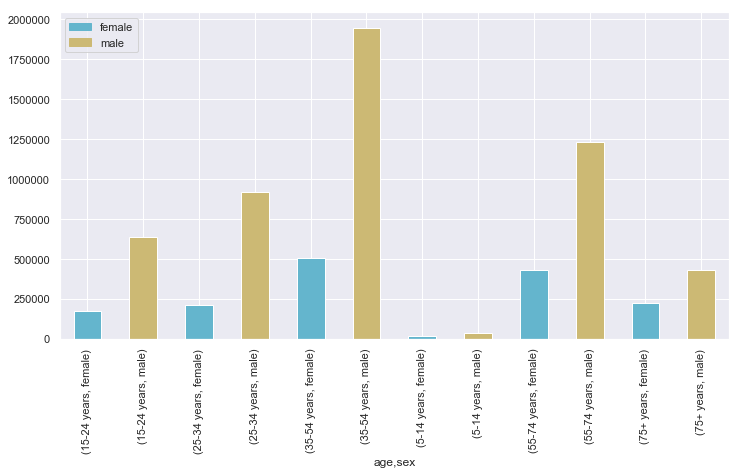

In [14]:
df.groupby(['age','sex'])['suicides_no'].sum().plot(kind = 'bar', color = ['c','y'], figsize = (12,6))
fem = mpatches.Patch(color = 'c', label = 'female')
male = mpatches.Patch(color = 'y', label = 'male')
plt.legend(handles = [fem, male], loc = 'upper left')

In [15]:
df['generation'].value_counts()

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

In [16]:
df['age'].value_counts()

35-54 years    4642
25-34 years    4642
15-24 years    4642
55-74 years    4642
75+ years      4642
5-14 years     4610
Name: age, dtype: int64

As we can see from the above two results that we have six categories for both the age(age group) column and the generation column(which ideally represents the age group of the victim) but the numbers just do not match up. Thus, it seems that some of them in the same group have been listed in differnet generation columns. And, that is evident from the following observations.

In [17]:
df.loc[df['generation'] == 'Millenials'].head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
44,Albania,1992,female,5-14 years,0,336700,0.00,NaN,"709,452,584",251,Millenials
46,Albania,1992,male,5-14 years,0,362900,0.00,NaN,"709,452,584",251,Millenials
57,Albania,1993,female,5-14 years,1,340300,0.29,NaN,"1,228,071,038",437,Millenials
58,Albania,1993,male,5-14 years,1,367000,0.27,NaN,"1,228,071,038",437,Millenials
70,Albania,1994,male,5-14 years,1,371800,0.27,NaN,"1,985,673,798",697,Millenials


In [18]:
df.loc[df['generation'] == 'Millenials'].tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27802,Uzbekistan,2013,female,25-34 years,146,2647820,5.51,0.672,"57,690,453,461",2150,Millenials
27809,Uzbekistan,2014,male,25-34 years,318,2739150,11.61,0.675,"63,067,077,179",2309,Millenials
27810,Uzbekistan,2014,female,15-24 years,347,2992817,11.59,0.675,"63,067,077,179",2309,Millenials
27812,Uzbekistan,2014,male,15-24 years,347,3126905,11.10,0.675,"63,067,077,179",2309,Millenials
27814,Uzbekistan,2014,female,25-34 years,162,2735238,5.92,0.675,"63,067,077,179",2309,Millenials


As we can see that victims from age groups 5-14 years, 15-24 years, 25-34 years all have been listed in the generation millenials.

Thus, due to these inconsistencies in the generation column and also since the information that the column gives is more discretely provided by the age(age group) column. Thus, it would be appropriate to drop the generation column.

In [19]:
df.drop(columns = ['generation'], inplace = True)

In [20]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($)
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,"2,156,624,900",796
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,"2,156,624,900",796
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,"2,156,624,900",796
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,"2,156,624,900",796
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,"2,156,624,900",796


Let's calculate and plot average global suicide rates and their transition throughout the years

Text(0, 0.5, 'suicides/100k population')

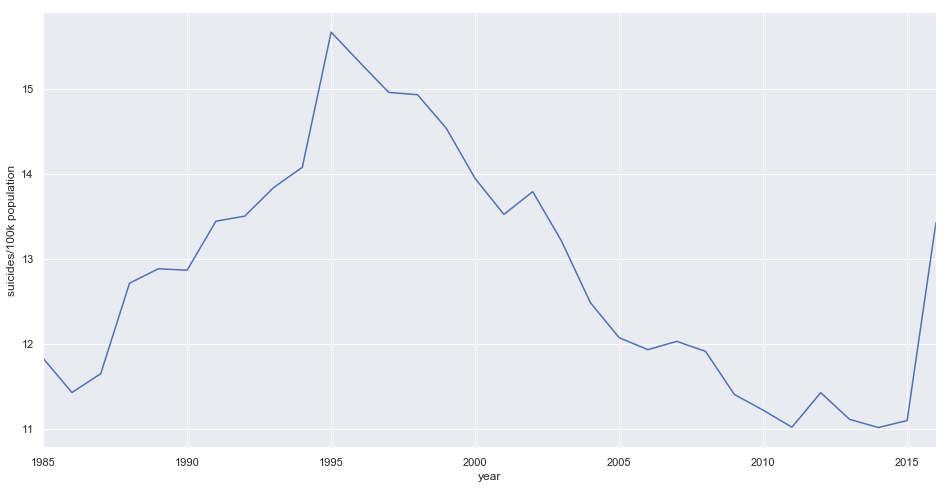

In [21]:
df.groupby(['year'])['suicides/100k pop'].mean().plot(figsize = (16,8))
plt.ylabel('suicides/100k population')

The above line graph shows a sharp increase in average suicide rates from 1985-1995 of about 33.3% and a sharp decline in the same in the next decade from 1995-2005 of around 25%. Just when we start to get a feeling that the world is becoming a happier place with continuous decline in the suicide rates the graph begins to rise sharply from 2015. 

In [101]:
suicide_rates = df.groupby(['country'])['suicides/100k pop'].median().sort_values(ascending = False)
suicide_rates

country
Sri Lanka                       22.990
Lithuania                       22.910
Russian Federation              19.125
Latvia                          18.160
Hungary                         17.785
Slovenia                        17.470
Estonia                         17.085
Japan                           16.820
Kazakhstan                      16.035
Belarus                         15.865
Austria                         15.720
Ukraine                         15.700
Belgium                         15.605
Mongolia                        15.475
Guyana                          15.255
Suriname                        14.925
Croatia                         14.685
Republic of Korea               14.405
Finland                         14.260
France                          13.970
Cuba                            13.905
Switzerland                     13.695
Serbia                          13.275
Sweden                          11.590
Czech Republic                  11.055
Luxembourg       

Countries with the highest average suicide rates throughout the years(1985-2016)

In [102]:
suicide_rates.head()

country
Sri Lanka             22.990
Lithuania             22.910
Russian Federation    19.125
Latvia                18.160
Hungary               17.785
Name: suicides/100k pop, dtype: float64

Countries with the lowest average suicide rates throughout the years(1985-2016)

In [103]:
suicide_rates.tail()

country
Oman                            0.0
Jamaica                         0.0
Montenegro                      0.0
Kiribati                        0.0
Saint Vincent and Grenadines    0.0
Name: suicides/100k pop, dtype: float64

The countries in the above list shows zero suicide rates from 1985-2016. This is possibly due to lack of data and so we would probably not analyze these countries in depth.

What we would do instead is analyze countries with suicides/100000 less than 1

# Countries with highest suicide rates
Lithuania,
Srilanka,
Russian Federation,
Hungary,
Belarus

# Lithuania

In [25]:
Lith_suicides = df.loc[df['country'] == 'Lithuania']
Lith_suicides

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($)
15044,Lithuania,1995,male,35-54 years,632,436306,144.85,0.701,"7,870,782,261",2324
15045,Lithuania,1995,male,75+ years,67,47214,141.91,0.701,"7,870,782,261",2324
15046,Lithuania,1995,male,55-74 years,325,274196,118.53,0.701,"7,870,782,261",2324
15047,Lithuania,1995,male,25-34 years,226,284758,79.37,0.701,"7,870,782,261",2324
15048,Lithuania,1995,male,15-24 years,134,263792,50.80,0.701,"7,870,782,261",2324
15049,Lithuania,1995,female,75+ years,37,109609,33.76,0.701,"7,870,782,261",2324
15050,Lithuania,1995,female,55-74 years,101,408926,24.70,0.701,"7,870,782,261",2324
15051,Lithuania,1995,female,35-54 years,113,481445,23.47,0.701,"7,870,782,261",2324
15052,Lithuania,1995,female,25-34 years,33,276055,11.95,0.701,"7,870,782,261",2324
15053,Lithuania,1995,female,15-24 years,20,256623,7.79,0.701,"7,870,782,261",2324


Text(0, 0.5, 'suicides /100000 population')

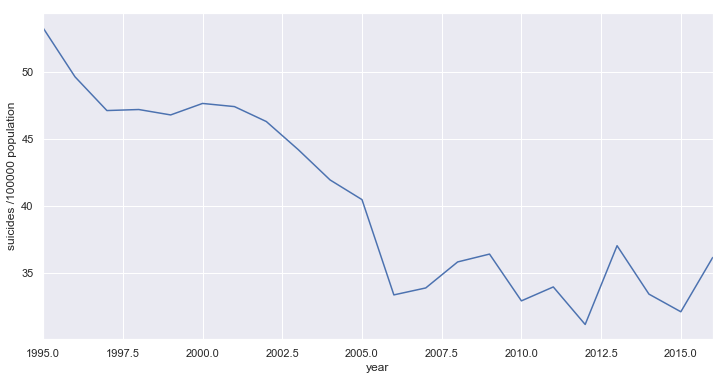

In [26]:
Lith_suicides.groupby(['year'])['suicides/100k pop'].mean().plot(figsize = (12,6))
plt.ylabel('suicides /100000 population')

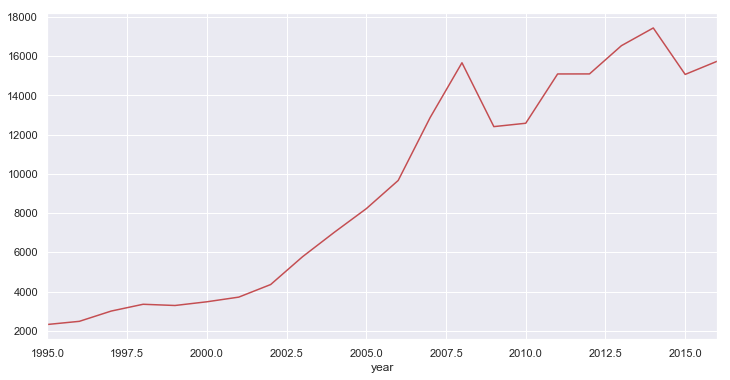

In [27]:
Lith_suicides.groupby(['year'])['gdp_per_capita ($)'].mean().plot(figsize = (12,6), color = 'r')

As evident from the above two plots with the rise in per capita gdp(average) the suicide show a sharp decline. 

Let's compare male and female suicides in Lithuania over time

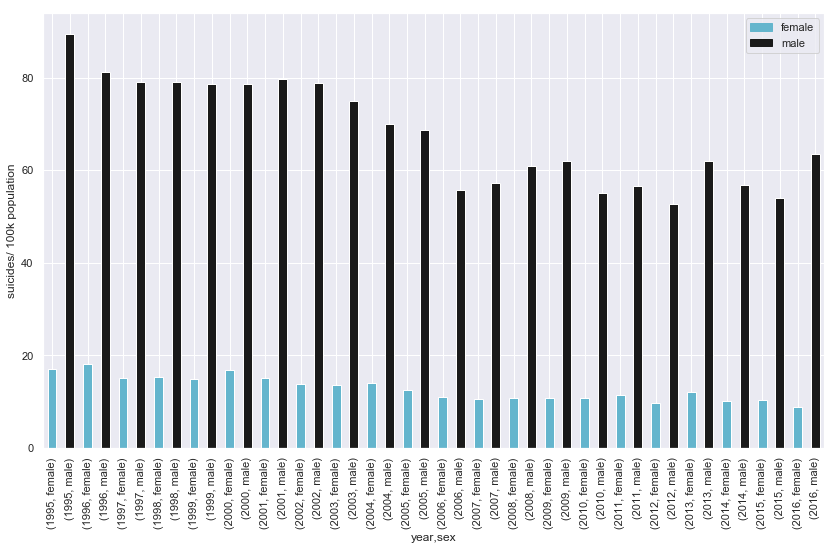

In [33]:
Lith_suicides.groupby(['year','sex'])['suicides/100k pop'].mean().plot(kind = 'bar', color = ['c','k'], figsize = (14,8))
plt.ylabel('suicides/ 100k population')
fem = mpatches.Patch(color = 'c', label = 'female')
male = mpatches.Patch(color = 'k', label = 'male')
plt.legend(handles = [fem, male], loc = 'upper right')

The above plot gives an overall picture of male and female suicide rates in Lithuania over time.

Now, let's check for suicide rates with respect to distinct age groups.

In [34]:
Lith_suicides.groupby(['age'])['suicides/100k pop'].mean().sort_values()

age
5-14 years      1.255952
15-24 years    25.617500
25-34 years    39.680909
75+ years      56.141136
55-74 years    56.728182
35-54 years    61.289773
Name: suicides/100k pop, dtype: float64

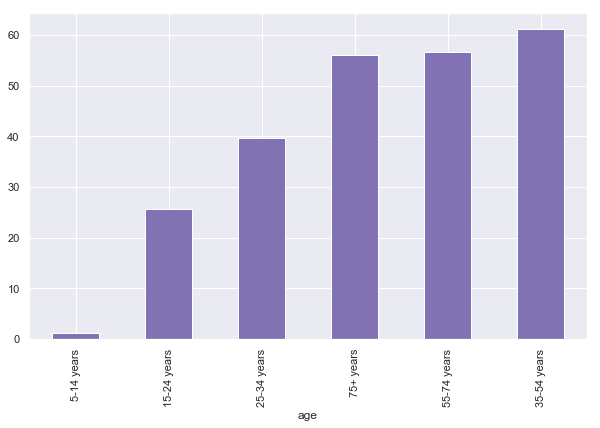

In [35]:
Lith_suicides.groupby(['age'])['suicides/100k pop'].mean().sort_values().plot(kind = 'bar', figsize = (10,6), color = 'm')

The highest no. of suicides are committed by people in the age group of 35-54 in Lithuania

In [36]:
Lith_suicides.groupby(['age','sex'])['suicides/100k pop'].mean()

age          sex   
15-24 years  female      6.548182
             male       44.686818
25-34 years  female      8.755000
             male       70.606818
35-54 years  female     17.426364
             male      105.153182
5-14 years   female      0.861905
             male        1.650000
55-74 years  female     17.700909
             male       95.755455
75+ years    female     25.406818
             male       86.875455
Name: suicides/100k pop, dtype: float64

Let's compare male and female  at the suicide rates by age 

Text(0, 0.5, 'suicides/ 100k population')

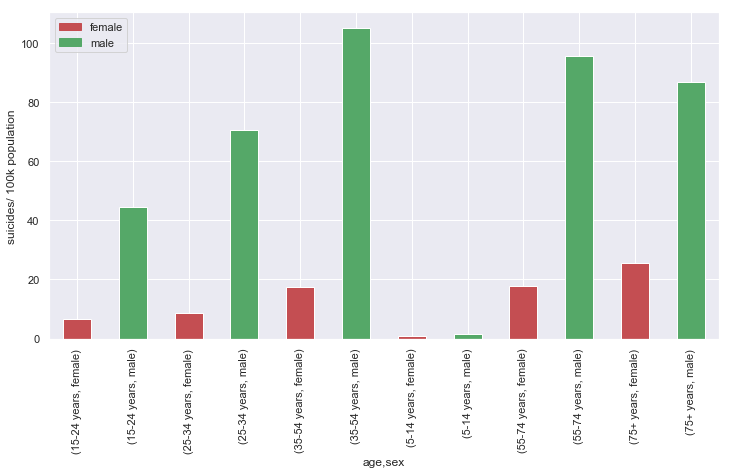

In [123]:
Lith_suicides.groupby(['age','sex'])['suicides/100k pop'].mean().plot(kind = 'bar', color = ['r', 'g'])
fem = mpatches.Patch(color = 'r', label = 'female')
male = mpatches.Patch(color = 'g', label = 'male')
plt.legend(handles = [fem, male], loc = 'upper left')
plt.ylabel('suicides/ 100k population')

Let's look at the same reult in form of a year by year comparisn on separate plot on a grid. This can be done using the Category plot or catplot feature of the seaborn library

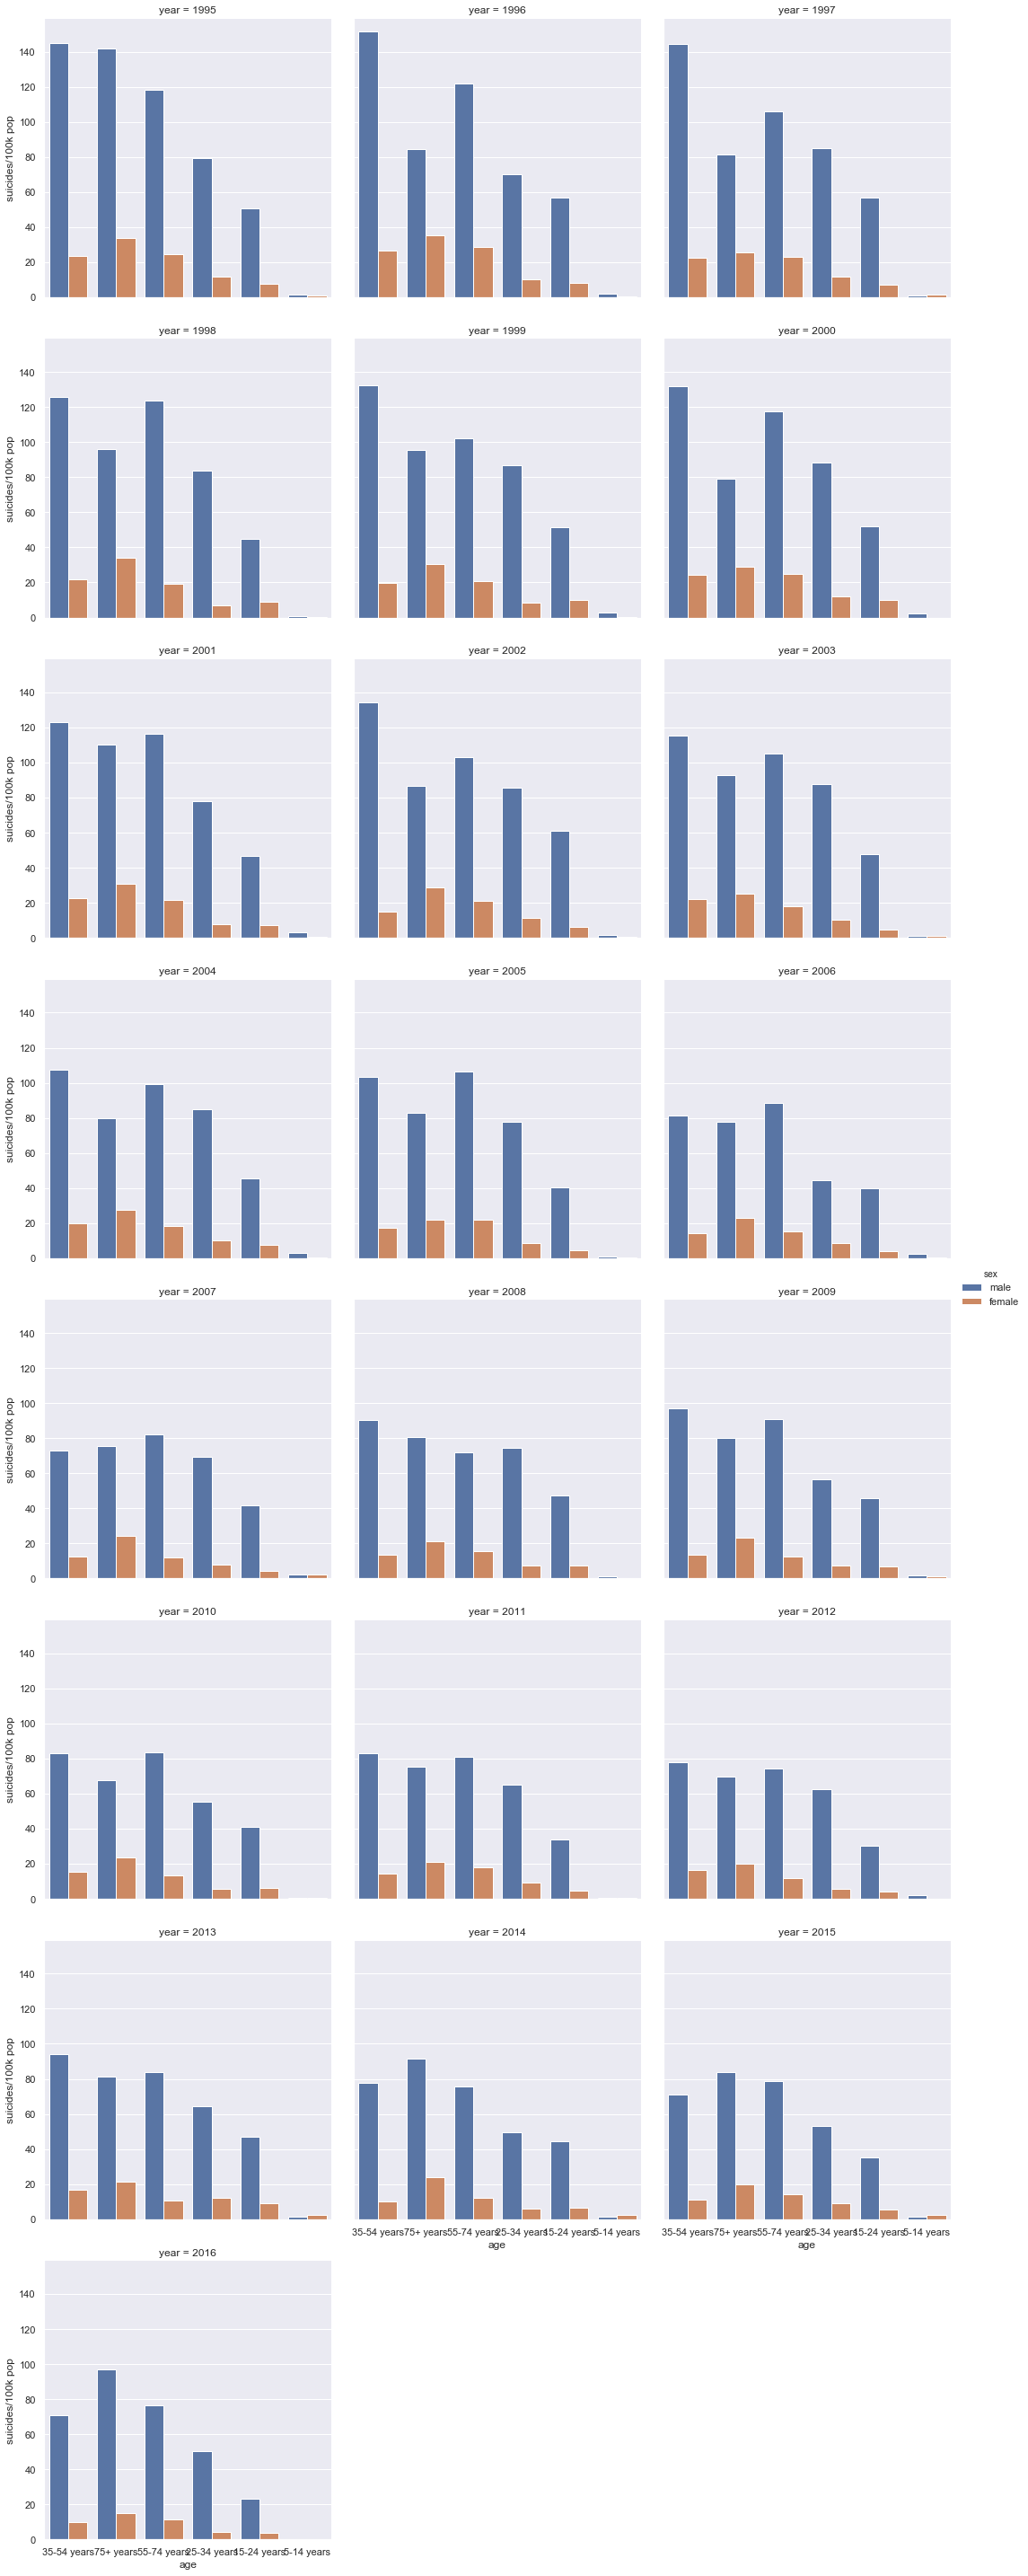

In [95]:
from numpy import average as avg
sns.catplot('age','suicides/100k pop', hue='sex', col='year', data = Lith_suicides, kind='bar', col_wrap=3, estimator=avg)

Let's analyze suicide rates and the possible factors that may be directly or indirectly affecting the suicide rates of a country with one of the lowest average suicide rates over the years.

# Kuwait                 

In [108]:
kuwait_sui = df.loc[df['country'] == 'Kuwait']
kuwait_sui

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($)
14180,Kuwait,1985,male,55-74 years,1,35200,2.84,0.732,"21,442,619,681",14607
14181,Kuwait,1985,male,35-54 years,6,235600,2.55,0.732,"21,442,619,681",14607
14182,Kuwait,1985,male,25-34 years,5,228000,2.19,0.732,"21,442,619,681",14607
14183,Kuwait,1985,female,25-34 years,2,136200,1.47,0.732,"21,442,619,681",14607
14184,Kuwait,1985,male,15-24 years,2,150900,1.33,0.732,"21,442,619,681",14607
14185,Kuwait,1985,female,35-54 years,1,121900,0.82,0.732,"21,442,619,681",14607
14186,Kuwait,1985,female,15-24 years,0,145200,0.00,0.732,"21,442,619,681",14607
14187,Kuwait,1985,female,5-14 years,0,189600,0.00,0.732,"21,442,619,681",14607
14188,Kuwait,1985,female,55-74 years,0,22400,0.00,0.732,"21,442,619,681",14607
14189,Kuwait,1985,female,75+ years,0,3400,0.00,0.732,"21,442,619,681",14607


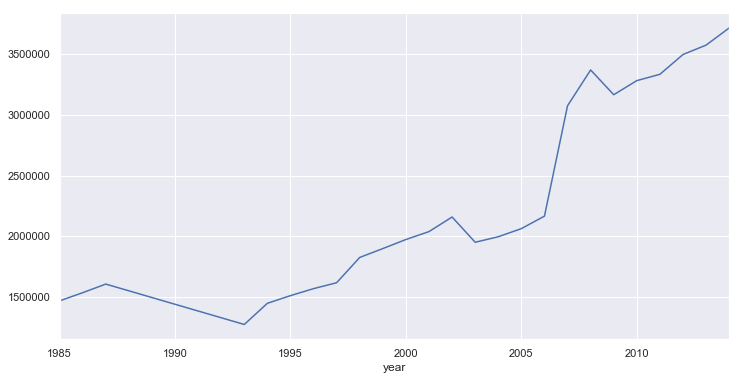

In [114]:
kuwait_sui.groupby(['year'])['population'].sum().plot()

Text(0, 0.5, 'suicides /100000 population')

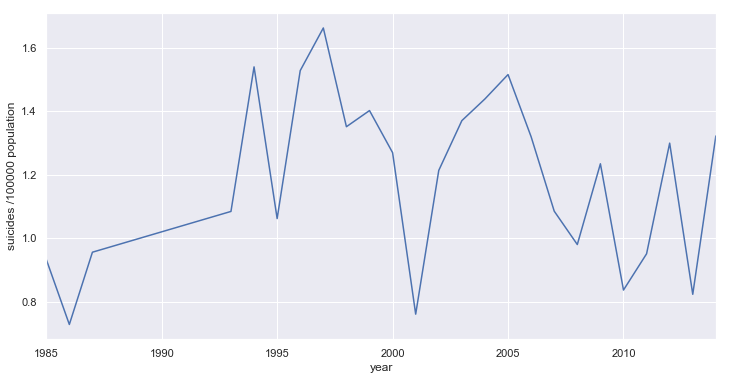

In [109]:
kuwait_sui.groupby(['year'])['suicides/100k pop'].mean().plot(figsize = (12,6))
plt.ylabel('suicides /100000 population')

Note: The above graph indicates that suicide rates in Kuwait have been quite fluctuating over the years. But that notion can be due to very low numbers of suicides in the country. If plotted on a macro scale or even in comparison with countries with high suicide rates. The plot would yield a pretty straight line.

Text(0, 0.5, 'amount(in USD)')

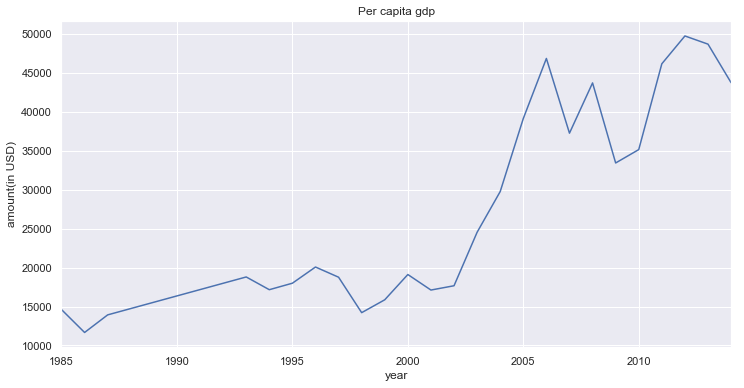

In [112]:
kuwait_sui.groupby(['year'])['gdp_per_capita ($)'].mean().plot(title = 'Per capita gdp')
plt.ylabel('amount(in USD)')

One important inferenece here is that Kuwait was almost five times that of Lithuania and hence, lesser suicide rates. Well, there is a possible correlation.

But, what an even more important  insight here is that with a constant rise in per capita gdp with an increasing population the suicide rates seem to be fluctuate in the micro plot and on the macro doesnt seem to change. That is, with an increase in per capita gdp suicide rates tend to be almost constant.

It seems that money isn't the only thing that make people happy!

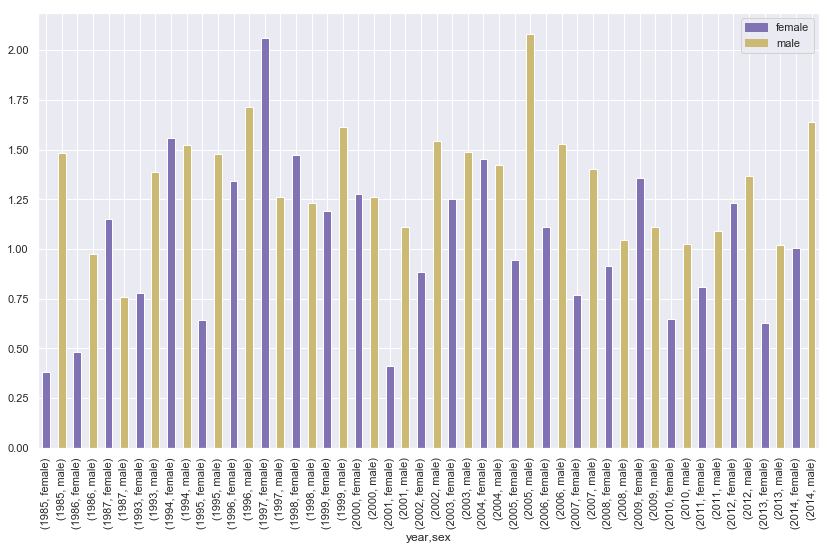

In [117]:
kuwait_sui.groupby(['year','sex'])['suicides/100k pop'].mean().plot(kind = 'bar', color = ['m','y'], figsize = (14,8))
fem = mpatches.Patch(color = 'm', label = 'female')
male = mpatches.Patch(color = 'y', label = 'male')
plt.legend(handles = [fem, male], loc = 'upper right')

It seems that in case of countries with low suicide rates too, an average male is more likely to commit suicide than an average female.

Let's look at which age group in Kuwait suffers the most and is the most prone to commit suicide.

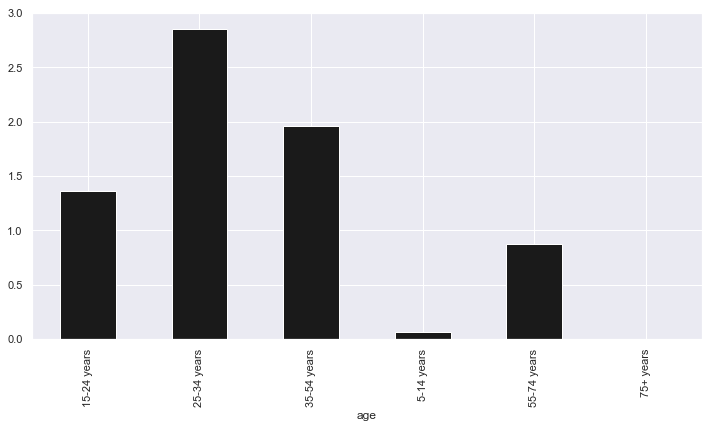

In [120]:
kuwait_sui.groupby(['age'])['suicides/100k pop'].mean().plot(kind = 'bar', color = 'k')

It's the younger generation aged(25-34) that seems to be committing the most suicides. 

Text(0, 0.5, 'suicides/ 100k population')

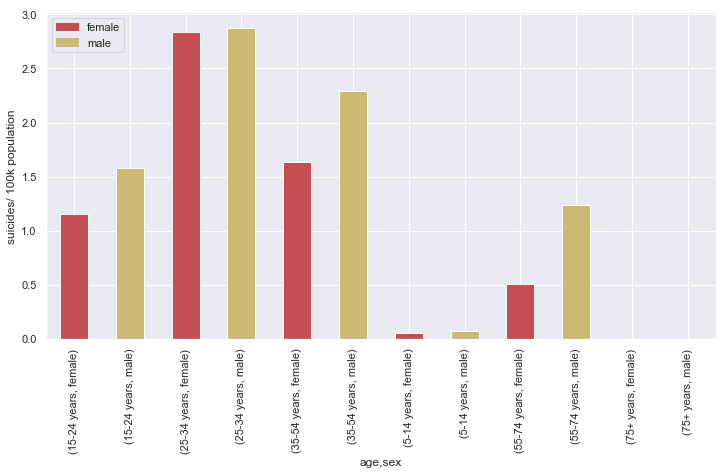

In [121]:
kuwait_sui.groupby(['age','sex'])['suicides/100k pop'].mean().plot(kind = 'bar', color = ['r', 'y'])
fem = mpatches.Patch(color = 'r', label = 'female')
male = mpatches.Patch(color = 'y', label = 'male')
plt.legend(handles = [fem, male], loc = 'upper left')
plt.ylabel('suicides/ 100k population')

Suicide rates among the age group most prone to suicides in Kuwait is almost same among males and females with that of males being higher fractionally.
And, that of the youngest age group i.e. (5-14 yrs) is the lowest.

The plot also shows that the elder generation i.e. 55+ suffer quite less than teir counterparts from countries with high suicide rates.

A more detailed categorical plot showing year on year suicie rates in Kuwait for both males and females of all age groups.

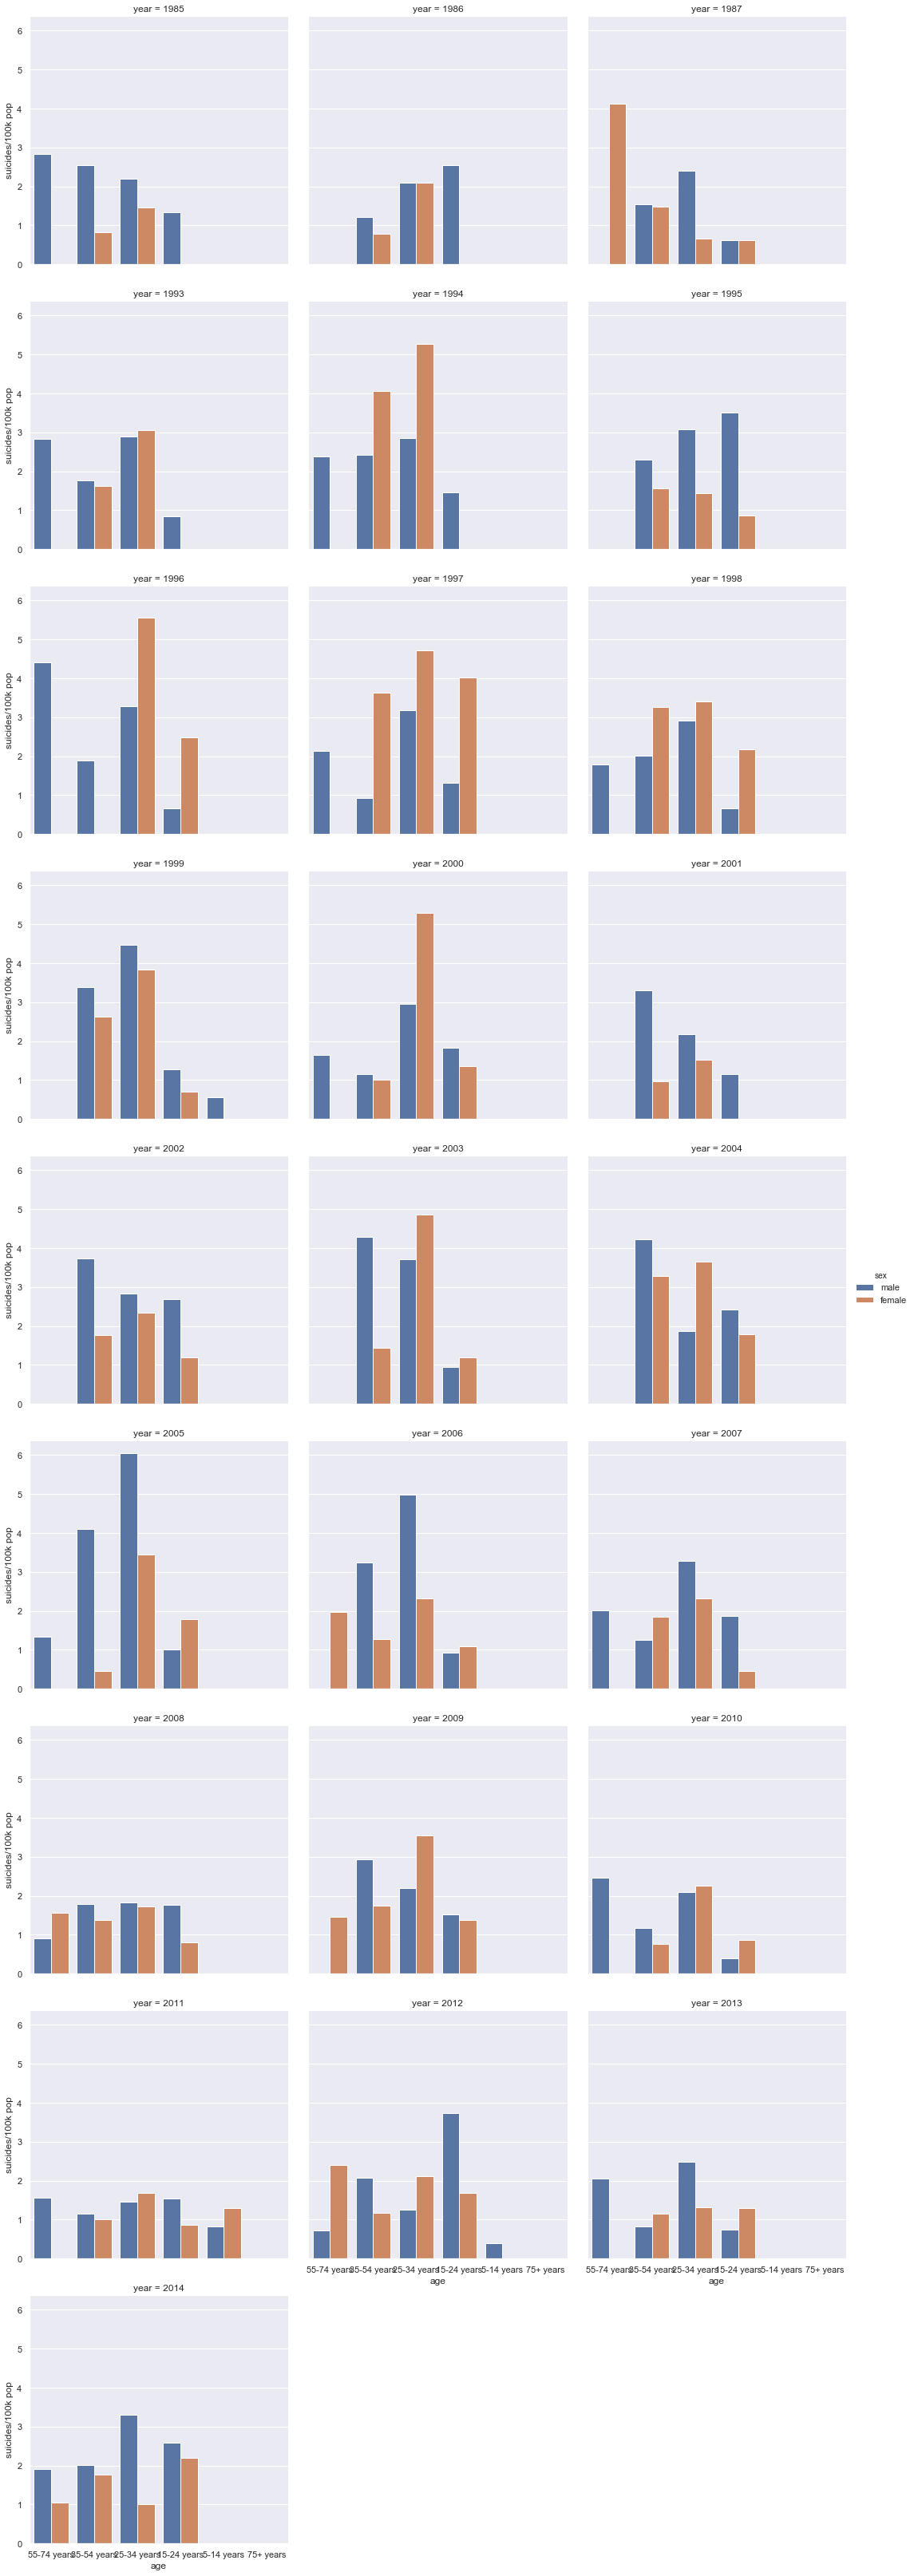

In [122]:
sns.catplot('age','suicides/100k pop', hue='sex', col='year', data = kuwait_sui, kind='bar', col_wrap=3, estimator=avg)